# Decision Tree Classifier for Bank Marketing Dataset

This notebook builds a Decision Tree Classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Load the dataset
df = pd.read_csv('bank.csv')

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [47]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [46]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(0)

In [45]:
df.shape

(11162, 17)

In [50]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [49]:
# Define the feature columns and target column
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'deposit'

In [51]:
data = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

In [52]:
# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
7968,57,950,9,1272,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1456,34,925,13,709,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
361,41,75,1,479,9,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
812,46,4414,18,504,7,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1092,28,4465,28,769,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,761,11,80,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
5191,28,159,16,449,2,33,4,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5390,35,1144,20,197,13,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
860,51,746,25,372,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [56]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
5527,65,744,5,182,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4541,38,1627,16,1323,9,-1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1964,35,4963,14,456,1,300,1,True,False,False,...,False,False,False,True,False,False,False,False,False,False
5007,47,8229,8,784,2,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
8928,35,1473,12,84,3,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,30,495,21,641,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
10702,44,12,19,126,2,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
10466,44,1945,14,191,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
8809,55,505,17,58,1,316,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [53]:
y_train

7968     no
1456    yes
361     yes
812     yes
1092    yes
       ... 
5734     no
5191    yes
5390     no
860     yes
7270     no
Name: deposit, Length: 7813, dtype: object

In [54]:
y_test

5527      no
4541     yes
1964     yes
5007     yes
8928      no
        ... 
1052     yes
10702     no
10466     no
8809      no
99       yes
Name: deposit, Length: 3349, dtype: object

In [55]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
# Make Predictions
y_pred = clf.predict(X_test)

In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.78501045088086


In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1398  344]
 [ 376 1231]]


In [58]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          no       0.79      0.80      0.80      1742
         yes       0.78      0.77      0.77      1607

    accuracy                           0.79      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.79      0.78      3349



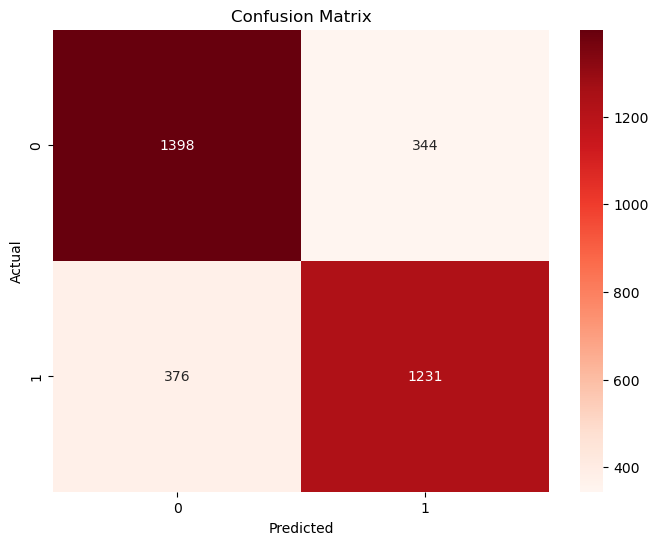

In [61]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
tree_structure = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_structure)

Decision Tree Structure:
|--- duration <= 251.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 123.50
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- month_oct <= 0.50
|   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |--- job_student <= 0.50
|   |   |   |   |   |   |   |--- day <= 1.50
|   |   |   |   |   |   |   |   |--- age <= 36.50
|   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |--- age >  36.50
|   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |--- day >  1.50
|   |   |   |   |   |   |   |   |--- duration <= 88.50
|   |   |   |   |   |   |   |   |   |--- month_sep <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- campaign <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- campaign >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   | 